In [2]:
import os, sys
import numpy as np
import pandas as pd
import dowhy
from dowhy import CausalModel
import dowhy.datasets, dowhy.plotter
np.seterr(divide='ignore',invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [3]:
data = pd.read_csv("exp_merge_mix.csv")

data.head()

,New-Identifiers-words-AVG,New-Identifiers-words-MIN,New-Abstractness-words-AVG,New-Abstractness-words-MAX,New-Abstractness-words-MIN,New-Commented-words-AVG,New-Commented-words-MAX,New-Synonym-commented-words-AVG,New-Synonym-commented-words-MAX,New-Comments-readability,...,BW-Avg-conditionals,BW-Avg-spaces,BW-Max-indentation,BW-Avg-indentation,BW-Avg-comments,BW-Max-char,BW-Avg-blank-lines,BW-Max-line-length,BW-Avg-line-length,Readable
0,0.882353,0,3.733333,10,0,0.000000,0,1.434783,4,0.0,...,0.0909,1.0909,6,3.2000,0.0,17,0.0909,59,26.4545,2.99
1,0.848485,0,5.357143,9,0,0.151515,1,2.078947,5,0.0,...,0.2727,1.7273,4,2.4444,0.0,19,0.1818,66,26.3636,3.74
2,0.805556,0,5.242424,9,0,0.083333,1,1.974359,7,0.0,...,0.2857,3.8571,4,2.4286,0.0,17,0.0000,110,46.1429,2.69
3,0.875000,0,7.142857,10,3,0.041667,1,1.576923,4,100.0,...,0.0000,1.8571,3,1.2308,0.5,20,0.0714,77,35.2857,4.03
4,0.882353,0,4.066667,15,0,0.176471,1,0.750000,3,100.0,...,0.1000,0.9000,3,1.4000,0.3,11,0.0000,51,23.2000,4.19


In [4]:
name_list = ['Readable', 'BW-Avg-number-of-identifiers', 'BW-Avg-comments', 'BW-Max-indentation',
        'BW-Max-char', 'BW-Avg-periods', 'BW-Avg-Assignment', 'BW-Max-line-length',
        'New-Semantic-Text-Coherence-Standard-@-0.1', 'BW-Avg-Identifiers-Length', "New-Number-of-senses-AVG",
                    'BW-Max-Single-identifiers', 'BW-Max-number-of-identifiers']

list = []
for row in data:
    list.append(row)

for element in list:
    if element not in name_list:
        data.drop([element], axis=1, inplace=True)
        
data.head()

,New-Number-of-senses-AVG,New-Semantic-Text-Coherence-Standard-@-0.1,BW-Avg-Identifiers-Length,BW-Avg-number-of-identifiers,BW-Max-number-of-identifiers,BW-Max-Single-identifiers,BW-Avg-Assignment,BW-Avg-periods,BW-Max-indentation,BW-Avg-comments,BW-Max-char,BW-Max-line-length,Readable
0,9.882353,6,6.8889,1.1818,5,4,0.1818,0.1818,6,0.0,17,59,2.99
1,10.181818,5,6.9000,1.5455,5,4,0.1818,0.7273,4,0.0,19,66,3.74
2,6.444444,6,10.1818,2.7143,9,5,0.4286,0.2857,4,0.0,17,110,2.69
3,6.500000,5,9.5455,1.0000,5,2,0.2143,0.0000,3,0.5,20,77,4.03
4,11.235294,5,8.8750,0.7000,2,1,0.0000,0.3000,3,0.3,11,51,4.19


In [5]:
causal_graph = """digraph {
"BW-Avg-Assignment" [pos="0.614,-0.296"]
"BW-Avg-Identifiers-Length" [pos="-1.112,1.062"]
"BW-Avg-comments" [pos="-0.029,1.175"]
"BW-Avg-number-of-identifiers" [pos="-0.645,1.243"]
"BW-Avg-periods" [pos="0.338,-0.775"]
"BW-Max-Single-identifiers" [pos="0.564,0.251"]
"BW-Max-char" [pos="-1.383,0.634"]
"BW-Max-indentation" [pos="-0.021,-1.147"]
"BW-Max-line-length" [pos="-1.001,-1.097"]
"BW-Max-number-of-identifiers" [pos="0.369,0.747"]
"New-Number-of-senses-AVG" [pos="-1.364,-0.634"]
"New-Semantic-Text-Coherence-Standard-@-0.1" [pos="-1.571,0.019"]
Readable [pos="-0.515,-1.294"]
"BW-Avg-Assignment" -> "BW-Avg-Identifiers-Length"
"BW-Avg-Assignment" -> "BW-Avg-number-of-identifiers"
"BW-Avg-Identifiers-Length" -> "BW-Max-char"
"BW-Avg-comments" -> Readable
"BW-Avg-number-of-identifiers" -> "BW-Avg-comments"
"BW-Avg-periods" -> "BW-Avg-number-of-identifiers"
"BW-Max-Single-identifiers" -> "BW-Avg-periods"
"BW-Max-Single-identifiers" -> "BW-Max-char"
"BW-Max-Single-identifiers" -> "New-Semantic-Text-Coherence-Standard-@-0.1"
"BW-Max-char" -> "BW-Max-line-length"
"BW-Max-indentation" -> "BW-Avg-comments"
"BW-Max-indentation" -> Readable
"BW-Max-line-length" -> "BW-Max-number-of-identifiers"
"BW-Max-number-of-identifiers" -> "BW-Avg-number-of-identifiers"
"New-Semantic-Text-Coherence-Standard-@-0.1" -> "BW-Max-char"
}"""


--------------------------------------
--------------------------------------
--------------------------------------

Readable
--------------------------------------
--------------------------------------
--------------------------------------

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                        
───────────(Expectation(Readable|BW-Avg-Identifiers-Length,BW-Max-char,BW-Max-
d[Readable]                                                                   

                                                                              
line-length,New-Number-of-senses-AVG,BW-Max-number-of-identifiers,BW-Avg-numbe
                                                                              

                                                                              
r-of-identifiers,BW-Max-Single-identifiers,New-Semantic-

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                       
──────────────(Expectation(Readable|BW-Avg-Identifiers-Length,BW-Max-indentati
d[BW-Max-char]                                                                

                                                                              
on,New-Number-of-senses-AVG,BW-Max-Single-identifiers,New-Semantic-Text-Cohere
                                                                              

                                                     
nce-Standard-@-0.1,BW-Avg-Assignment,BW-Avg-periods))
                                                     
Estimand assumption 1, Unconfoundedness: If U→{BW-Max-char} and U→Readable then P(Readable|BW-Max-char,BW-Avg-Identifiers-Length,BW-Max-indentation,New-Number-of-senses-AVG,BW-Max-Single-identifiers,New-Semantic-Text-C

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                                                                    
────────────────────(Expectation(Readable|BW-Max-indentation,New-Number-of-sen
d[BW-Avg-Assignment]                                                          

                                                                              
ses-AVG,BW-Max-Single-identifiers,New-Semantic-Text-Coherence-Standard-@-0.1,B
                                                                              

               
W-Avg-periods))
               
Estimand assumption 1, Unconfoundedness: If U→{BW-Avg-Assignment} and U→Readable then P(Readable|BW-Avg-Assignment,BW-Max-indentation,New-Number-of-senses-AVG,BW-Max-Single-identifiers,New-Semantic-Text-Coherence-Standard-@-0.1,BW-Avg-periods,U) = P(Readable|BW-Avg-Assignment,BW-Max-indentation,New-Number-of-senses-AVG,BW-Max-Sing

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
             d                                                                
────────────────────────────(Expectation(Readable|BW-Max-indentation,New-Numbe
d[BW-Avg-Identifiers-Length]                                                  

                                                                              
r-of-senses-AVG,BW-Max-Single-identifiers,New-Semantic-Text-Coherence-Standard
                                                                              

                                         
-@-0.1,BW-Avg-Assignment,BW-Avg-periods))
                                         
Estimand assumption 1, Unconfoundedness: If U→{BW-Avg-Identifiers-Length} and U→Readable then P(Readable|BW-Avg-Identifiers-Length,BW-Max-indentation,New-Number-of-senses-AVG,BW-Max-Single-identifiers,New-Semantic-Text-Coherence-Standard-@-0.1,BW-Avg-Ass

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
             d                                                                
────────────────────────────(Expectation(Readable|BW-Avg-Identifiers-Length,BW
d[BW-Max-Single-identifiers]                                                  

                                                             
-Max-indentation,New-Number-of-senses-AVG,BW-Avg-Assignment))
                                                             
Estimand assumption 1, Unconfoundedness: If U→{BW-Max-Single-identifiers} and U→Readable then P(Readable|BW-Max-Single-identifiers,BW-Avg-Identifiers-Length,BW-Max-indentation,New-Number-of-senses-AVG,BW-Avg-Assignment,U) = P(Readable|BW-Max-Single-identifiers,BW-Avg-Identifiers-Length,BW-Max-indentation,New-Number-of-senses-AVG,BW-Avg-Assignment)

## Realized estimand
b: Readable~BW-Max-Single-identifiers+BW-Avg-Identifiers-Len

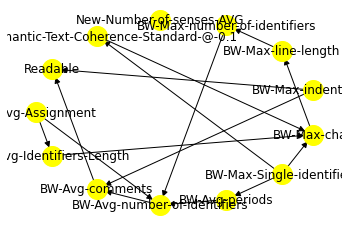

In [6]:
# measure the effect directly
for feature in name_list:
    print("--------------------------------------\n--------------------------------------\n--------------------------------------\n")
    print(feature)
    print("--------------------------------------\n--------------------------------------\n--------------------------------------\n")
    model= dowhy.CausalModel(
        data = data,
        graph = causal_graph.replace("\n", " "),
        treatment = feature,
        outcome = "Readable",
    )
    identified_estimand = model.identify_effect()
    estimate = model.estimate_effect(identified_estimand,
                              method_name="backdoor.linear_regression",target_units="ate")
    if feature == 'Readable':
        model.view_model()
    try:
        print(estimate)
    except Exception as e:
        continue

In [7]:
model= dowhy.CausalModel(
    data = data,
    graph=causal_graph.replace("\n", " "),
    treatment= 'BW-Avg-number-of-identifiers',
    outcome='Readable')
identified_estimand = model.identify_effect()
estimate = model.estimate_effect(identified_estimand,
                          method_name="backdoor.linear_regression",target_units="ate")
print(estimate)
# 「Add Random Common Cause」
# If the hypothesis is correct, the causal effect will not change much after adding random confounding factors.
res_random=model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
print(res_random)

# 「Placebo Treatment」
# Replace the intervention with a random variable. If the hypothesis is correct, the causal effect should be close to 0
res_placebo=model.refute_estimate(identified_estimand, estimate,
      method_name="placebo_treatment_refuter", placebo_type="permute")
print(res_placebo)

# 「Data Subsets Validation」
# The causal effect is estimated on the data subset. If the assumption is correct, the causal effect should not change much
res_subset=model.refute_estimate(identified_estimand, estimate,
      method_name="data_subset_refuter", subset_fraction=0.9)
print(res_subset)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
               d                                                              
───────────────────────────────(Expectation(Readable|BW-Avg-Identifiers-Length
d[BW-Avg-number-of-identifiers]                                               

                                                                              
,BW-Max-indentation,BW-Max-char,BW-Max-line-length,New-Number-of-senses-AVG,BW
                                                                              

                                                                    
-Max-Single-identifiers,New-Semantic-Text-Coherence-Standard-@-0.1))
                                                                    
Estimand assumption 1, Unconfoundedness: If U→{BW-Avg-number-of-identifiers} and U→Readable then P(Readable|BW-Avg-number-of-identifiers,BW-Avg-Identifiers-Length,BW-Max-ind

In [8]:
model= dowhy.CausalModel(
    data = data,
    graph=causal_graph.replace("\n", " "),
    treatment= 'BW-Avg-comments',
    common_causes = 'BW-Max-indentation',
    outcome='Readable')
identified_estimand = model.identify_effect()
estimate = model.estimate_effect(identified_estimand,
                          method_name="backdoor.linear_regression",target_units="ate")
print(estimate)
# 「Add Random Common Cause」
# If the hypothesis is correct, the causal effect will not change much after adding random confounding factors.
res_random=model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
print(res_random)

# 「Placebo Treatment」
# Replace the intervention with a random variable. If the hypothesis is correct, the causal effect should be close to 0
res_placebo=model.refute_estimate(identified_estimand, estimate,
      method_name="placebo_treatment_refuter", placebo_type="permute")
print(res_placebo)

# 「Data Subsets Validation」
# The causal effect is estimated on the data subset. If the assumption is correct, the causal effect should not change much
res_subset=model.refute_estimate(identified_estimand, estimate,
      method_name="data_subset_refuter", subset_fraction=0.9)
print(res_subset)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                                                                     
──────────────────(Expectation(Readable|BW-Avg-Identifiers-Length,BW-Max-char,
d[BW-Avg-comments]                                                            

                                                                              
BW-Max-indentation,BW-Max-line-length,New-Number-of-senses-AVG,BW-Max-number-o
                                                                              

                                                                              
f-identifiers,BW-Max-Single-identifiers,New-Semantic-Text-Coherence-Standard-@
                                                                              

                                       
-0.1,BW-Avg-Assignment,BW-Avg-periods))
                                       
Estimand assumption 1,

In [9]:
model= dowhy.CausalModel(
    data = data,
    graph=causal_graph.replace("\n", " "),
    treatment= 'BW-Max-indentation', 
    outcome='Readable')
identified_estimand = model.identify_effect()
estimate = model.estimate_effect(identified_estimand,
                          method_name="backdoor.linear_regression",target_units="ate")
print(estimate)
# 「Add Random Common Cause」
# If the hypothesis is correct, the causal effect will not change much after adding random confounding factors.
res_random=model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
print(res_random)

# 「Placebo Treatment」
# Replace the intervention with a random variable. If the hypothesis is correct, the causal effect should be close to 0
res_placebo=model.refute_estimate(identified_estimand, estimate,
      method_name="placebo_treatment_refuter", placebo_type="permute")
print(res_placebo)

# 「Data Subsets Validation」
# The causal effect is estimated on the data subset. If the assumption is correct, the causal effect should not change much
res_subset=model.refute_estimate(identified_estimand, estimate,
      method_name="data_subset_refuter", subset_fraction=0.9)
print(res_subset)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
          d                                                                   
─────────────────────(Expectation(Readable|BW-Avg-Identifiers-Length,BW-Max-ch
d[BW-Max-indentation]                                                         

                                                                              
ar,BW-Max-line-length,New-Number-of-senses-AVG,BW-Max-number-of-identifiers,BW
                                                                              

                                                                              
-Avg-number-of-identifiers,BW-Max-Single-identifiers,New-Semantic-Text-Coheren
                                                                              

                                                    
ce-Standard-@-0.1,BW-Avg-Assignment,BW-Avg-periods))
                                    

In [10]:
model= dowhy.CausalModel(
    data = data,
    graph=causal_graph.replace("\n", " "),
    treatment= 'BW-Max-char',
    common_causes = 'BW-Max-Single-identifiers',
    outcome='Readable')
identified_estimand = model.identify_effect()
estimate = model.estimate_effect(identified_estimand,
                          method_name="backdoor.linear_regression",target_units="ate")
print(estimate)
# 「Add Random Common Cause」
# If the hypothesis is correct, the causal effect will not change much after adding random confounding factors.
res_random=model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
print(res_random)

# 「Placebo Treatment」
# Replace the intervention with a random variable. If the hypothesis is correct, the causal effect should be close to 0
res_placebo=model.refute_estimate(identified_estimand, estimate,
      method_name="placebo_treatment_refuter", placebo_type="permute")
print(res_placebo)

# 「Data Subsets Validation」
# The causal effect is estimated on the data subset. If the assumption is correct, the causal effect should not change much
res_subset=model.refute_estimate(identified_estimand, estimate,
      method_name="data_subset_refuter", subset_fraction=0.9)
print(res_subset)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                       
──────────────(Expectation(Readable|BW-Avg-Identifiers-Length,BW-Max-indentati
d[BW-Max-char]                                                                

                                                                              
on,New-Number-of-senses-AVG,BW-Max-Single-identifiers,New-Semantic-Text-Cohere
                                                                              

                                                     
nce-Standard-@-0.1,BW-Avg-Assignment,BW-Avg-periods))
                                                     
Estimand assumption 1, Unconfoundedness: If U→{BW-Max-char} and U→Readable then P(Readable|BW-Max-char,BW-Avg-Identifiers-Length,BW-Max-indentation,New-Number-of-senses-AVG,BW-Max-Single-identifiers,New-Semantic-Text-C

In [11]:
model= dowhy.CausalModel(
    data = data,
    graph=causal_graph.replace("\n", " "),
    treatment= 'BW-Avg-periods',
    common_causes = 'BW-Max-Single-identifiers',
    outcome='Readable')

identified_estimand = model.identify_effect()
estimate = model.estimate_effect(identified_estimand,
                          method_name="backdoor.linear_regression",target_units="ate")
print(estimate.target_estimand)
# 「Add Random Common Cause」
# If the hypothesis is correct, the causal effect will not change much after adding random confounding factors.
res_random=model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
print(res_random)

# 「Placebo Treatment」
# Replace the intervention with a random variable. If the hypothesis is correct, the causal effect should be close to 0
res_placebo=model.refute_estimate(identified_estimand, estimate,
      method_name="placebo_treatment_refuter", placebo_type="permute")
print(res_placebo)

# 「Data Subsets Validation」
# The causal effect is estimated on the data subset. If the assumption is correct, the causal effect should not change much
res_subset=model.refute_estimate(identified_estimand, estimate,
      method_name="data_subset_refuter", subset_fraction=0.9)
print(res_subset)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                                                                     
─────────────────(Expectation(Readable|BW-Avg-Identifiers-Length,BW-Max-char,B
d[BW-Avg-periods]                                                             

                                                                              
W-Max-indentation,BW-Max-line-length,New-Number-of-senses-AVG,BW-Max-number-of
                                                                              

                                                                              
-identifiers,BW-Max-Single-identifiers,New-Semantic-Text-Coherence-Standard-@-
                                                                              

                       
0.1,BW-Avg-Assignment))
                       
Estimand assumption 1, Unconfoundedness: If U→{BW-Avg-periods} and U→Readable then P(Readable|BW-Avg-periods,BW-Avg-Id

In [12]:
model= dowhy.CausalModel(
    data = data,
    graph=causal_graph.replace("\n", " "),
    treatment= 'BW-Avg-Assignment',
    outcome='Readable')

identified_estimand = model.identify_effect()
estimate = model.estimate_effect(identified_estimand,
                          method_name="backdoor.linear_regression",target_units="ate")
print(estimate.target_estimand)
# 「Add Random Common Cause」
# If the hypothesis is correct, the causal effect will not change much after adding random confounding factors.
res_random=model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
print(res_random)

# 「Placebo Treatment」
# Replace the intervention with a random variable. If the hypothesis is correct, the causal effect should be close to 0
res_placebo=model.refute_estimate(identified_estimand, estimate,
      method_name="placebo_treatment_refuter", placebo_type="permute")
print(res_placebo)

# 「Data Subsets Validation」
# The causal effect is estimated on the data subset. If the assumption is correct, the causal effect should not change much
res_subset=model.refute_estimate(identified_estimand, estimate,
      method_name="data_subset_refuter", subset_fraction=0.9)
print(res_subset)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                                                                    
────────────────────(Expectation(Readable|BW-Max-indentation,New-Number-of-sen
d[BW-Avg-Assignment]                                                          

                                                                              
ses-AVG,BW-Max-Single-identifiers,New-Semantic-Text-Coherence-Standard-@-0.1,B
                                                                              

               
W-Avg-periods))
               
Estimand assumption 1, Unconfoundedness: If U→{BW-Avg-Assignment} and U→Readable then P(Readable|BW-Avg-Assignment,BW-Max-indentation,New-Number-of-senses-AVG,BW-Max-Single-identifiers,New-Semantic-Text-Coherence-Standard-@-0.1,BW-Avg-periods,U) = P(Readable|BW-Avg-Assignment,BW-Max-indentation,New-Number-of-senses-AVG,BW-Max-Single-identifiers,New-Semantic-Text-Coherence-Stand

In [13]:
model= dowhy.CausalModel(
    data = data,
    graph=causal_graph.replace("\n", " "),
    treatment= 'BW-Max-line-length',
    outcome='Readable')

identified_estimand = model.identify_effect()
estimate = model.estimate_effect(identified_estimand,
                          method_name="backdoor.linear_regression",target_units="ate")
print(estimate.target_estimand)
# 「Add Random Common Cause」
# If the hypothesis is correct, the causal effect will not change much after adding random confounding factors.
res_random=model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
print(res_random)

# 「Placebo Treatment」
# Replace the intervention with a random variable. If the hypothesis is correct, the causal effect should be close to 0
res_placebo=model.refute_estimate(identified_estimand, estimate,
      method_name="placebo_treatment_refuter", placebo_type="permute")
print(res_placebo)

# 「数据子集验证」。在数据子集上估计因果效应，如果假设正确，因果效应应该变化不大。
res_subset=model.refute_estimate(identified_estimand, estimate,
      method_name="data_subset_refuter", subset_fraction=0.9)
print(res_subset)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
          d                                                                   
─────────────────────(Expectation(Readable|BW-Avg-Identifiers-Length,BW-Max-ch
d[BW-Max-line-length]                                                         

                                                                              
ar,BW-Max-indentation,New-Number-of-senses-AVG,BW-Max-Single-identifiers,New-S
                                                                              

                                                                        
emantic-Text-Coherence-Standard-@-0.1,BW-Avg-Assignment,BW-Avg-periods))
                                                                        
Estimand assumption 1, Unconfoundedness: If U→{BW-Max-line-length} and U→Readable then P(Readable|BW-Max-line-length,BW-Avg-Identifiers-Length,BW-Max-char,BW-Max-indentation,New-Number-of-senses-AVG,BW-Max-Sin

In [14]:
model= dowhy.CausalModel(
    data = data,
    graph=causal_graph.replace("\n", " "),
    treatment= 'New-Semantic-Text-Coherence-Standard-@-0.1',
    common_causes = 'BW-Max-Single-identifiers',
    outcome='Readable')

identified_estimand = model.identify_effect()
estimate = model.estimate_effect(identified_estimand,
                          method_name="backdoor.linear_regression",target_units="ate")
print(estimate.target_estimand)
# 「Add Random Common Cause」
# If the hypothesis is correct, the causal effect will not change much after adding random confounding factors.
res_random=model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
print(res_random)

# 「Placebo Treatment」
# Replace the intervention with a random variable. If the hypothesis is correct, the causal effect should be close to 0
res_placebo=model.refute_estimate(identified_estimand, estimate,
      method_name="placebo_treatment_refuter", placebo_type="permute")
print(res_placebo)

# 「数据子集验证」。在数据子集上估计因果效应，如果假设正确，因果效应应该变化不大。
res_subset=model.refute_estimate(identified_estimand, estimate,
      method_name="data_subset_refuter", subset_fraction=0.9)
print(res_subset)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
                      d                                                       
─────────────────────────────────────────────(Expectation(Readable|BW-Avg-Iden
d[New-Semantic-Text-Coherence-Standard-@-0.1]                                 

                                                                              
tifiers-Length,BW-Max-indentation,New-Number-of-senses-AVG,BW-Max-Single-ident
                                                                              

                                         
ifiers,BW-Avg-Assignment,BW-Avg-periods))
                                         
Estimand assumption 1, Unconfoundedness: If U→{New-Semantic-Text-Coherence-Standard-@-0.1} and U→Readable then P(Readable|New-Semantic-Text-Coherence-Standard-@-0.1,BW-Avg-Identifiers-Length,BW-Max-indentation,New-Number-of-senses-AVG,BW-Max-Single-identifiers,BW-Avg-Assignment,BW-Avg-periods,U) = P(R

In [18]:
model= dowhy.CausalModel(
    data = data,
    graph=causal_graph.replace("\n", " "),
    treatment= 'BW-Avg-Identifiers-Length',
    common_causes = 'BW-Avg-Assignment',
    outcome='Readable')

identified_estimand = model.identify_effect()
estimate = model.estimate_effect(identified_estimand,
                          method_name="backdoor.linear_regression",target_units="ate")
print(estimate.target_estimand)
# 「Add Random Common Cause」
# If the hypothesis is correct, the causal effect will not change much after adding random confounding factors.
res_random=model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
print(res_random)

# 「Placebo Treatment」
# Replace the intervention with a random variable. If the hypothesis is correct, the causal effect should be close to 0
res_placebo=model.refute_estimate(identified_estimand, estimate,
      method_name="placebo_treatment_refuter", placebo_type="permute")
print(res_placebo)

# 「数据子集验证」。在数据子集上估计因果效应，如果假设正确，因果效应应该变化不大。
res_subset=model.refute_estimate(identified_estimand, estimate,
      method_name="data_subset_refuter", subset_fraction=0.9)
print(res_subset)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
             d                                                                
────────────────────────────(Expectation(Readable|BW-Max-indentation,New-Numbe
d[BW-Avg-Identifiers-Length]                                                  

                                                                              
r-of-senses-AVG,BW-Max-Single-identifiers,New-Semantic-Text-Coherence-Standard
                                                                              

                                         
-@-0.1,BW-Avg-Assignment,BW-Avg-periods))
                                         
Estimand assumption 1, Unconfoundedness: If U→{BW-Avg-Identifiers-Length} and U→Readable then P(Readable|BW-Avg-Identifiers-Length,BW-Max-indentation,New-Number-of-senses-AVG,BW-Max-Single-identifiers,New-Semantic-Text-Coherence-Standard-@-0.1,BW-Avg-Assignment,BW-Avg-periods,U) = P(Readable|BW-Avg-Id

In [16]:
model= dowhy.CausalModel(
    data = data,
    graph=causal_graph.replace("\n", " "),
    treatment= 'BW-Max-Single-identifiers',
    outcome='Readable')

identified_estimand = model.identify_effect()
estimate = model.estimate_effect(identified_estimand,
                          method_name="backdoor.linear_regression",target_units="ate")
print(estimate.target_estimand)
# 「Add Random Common Cause」
# If the hypothesis is correct, the causal effect will not change much after adding random confounding factors.
res_random=model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
print(res_random)

# 「Placebo Treatment」
# Replace the intervention with a random variable. If the hypothesis is correct, the causal effect should be close to 0
res_placebo=model.refute_estimate(identified_estimand, estimate,
      method_name="placebo_treatment_refuter", placebo_type="permute")
print(res_placebo)

# 「数据子集验证」。在数据子集上估计因果效应，如果假设正确，因果效应应该变化不大。
res_subset=model.refute_estimate(identified_estimand, estimate,
      method_name="data_subset_refuter", subset_fraction=0.9)
print(res_subset)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
             d                                                                
────────────────────────────(Expectation(Readable|BW-Avg-Identifiers-Length,BW
d[BW-Max-Single-identifiers]                                                  

                                                             
-Max-indentation,New-Number-of-senses-AVG,BW-Avg-Assignment))
                                                             
Estimand assumption 1, Unconfoundedness: If U→{BW-Max-Single-identifiers} and U→Readable then P(Readable|BW-Max-Single-identifiers,BW-Avg-Identifiers-Length,BW-Max-indentation,New-Number-of-senses-AVG,BW-Avg-Assignment,U) = P(Readable|BW-Max-Single-identifiers,BW-Avg-Identifiers-Length,BW-Max-indentation,New-Number-of-senses-AVG,BW-Avg-Assignment)

### Estimand : 2
Estimand name: iv
No such variable found!

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
Expect

In [17]:
model= dowhy.CausalModel(
    data = data,
    graph=causal_graph.replace("\n", " "),
    treatment= 'BW-Max-number-of-identifiers',
    outcome='Readable')

identified_estimand = model.identify_effect()
estimate = model.estimate_effect(identified_estimand,
                          method_name="backdoor.linear_regression",target_units="ate")
print(estimate.target_estimand)
# 「Add Random Common Cause」
# If the hypothesis is correct, the causal effect will not change much after adding random confounding factors.
res_random=model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
print(res_random)

# 「Placebo Treatment」
# Replace the intervention with a random variable. If the hypothesis is correct, the causal effect should be close to 0
res_placebo=model.refute_estimate(identified_estimand, estimate,
      method_name="placebo_treatment_refuter", placebo_type="permute")
print(res_placebo)

# 「数据子集验证」。在数据子集上估计因果效应，如果假设正确，因果效应应该变化不大。
res_subset=model.refute_estimate(identified_estimand, estimate,
      method_name="data_subset_refuter", subset_fraction=0.9)
print(res_subset)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
               d                                                              
───────────────────────────────(Expectation(Readable|BW-Avg-Identifiers-Length
d[BW-Max-number-of-identifiers]                                               

                                                                              
,BW-Max-char,BW-Max-indentation,BW-Max-line-length,New-Number-of-senses-AVG,BW
                                                                              

                                                                              
-Max-Single-identifiers,New-Semantic-Text-Coherence-Standard-@-0.1,BW-Avg-Assi
                                                                              

                       
gnment,BW-Avg-periods))
                       
Estimand assumption 1, Unconfoundedness: If U→{BW-Max-number-of-identifiers} and U→Readable then P(Readable|BW-Max-num